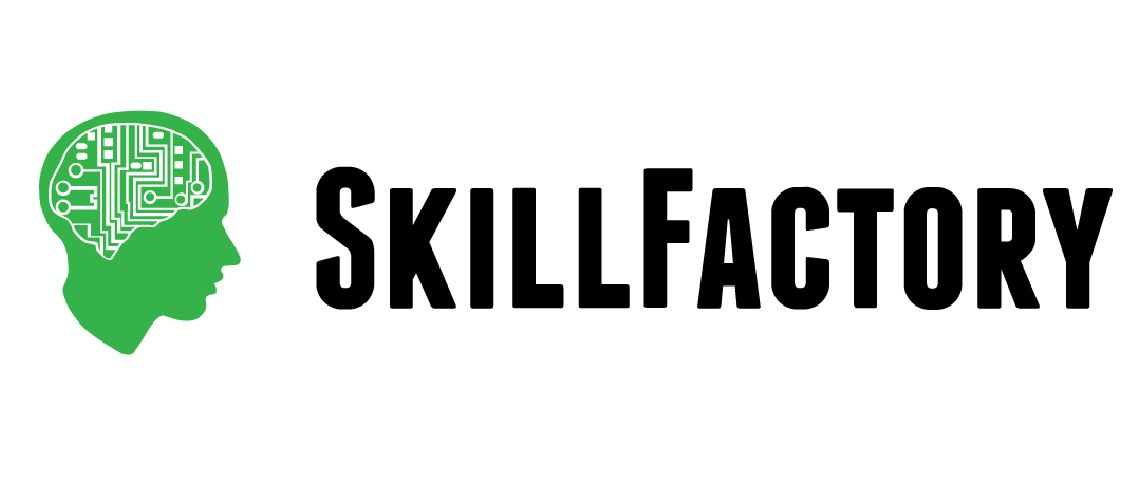

# Описание дипломного проекта


Дипломный проект "Мультикатегориальная классификация комментариев клиентов М.Видео, Эльдорадо"

**Бизнес-кейс:**

Одним из приоритетов бизнеса является создание лучшего клиентского опыта, поэтому для компании важно понимать текущий уровень CSI (customersatisfaction index) и его динамику 

(для оценки эффекта изменений в бизнес-процессах).

С этой целью, разработан автоматический механизм сбора обратной связи по заказам. 

Кроме общей оценки удовлетворённости, клиенты оставляют обратную связь в виде текстового комментария/отзыва в свободной форме.

Необходимо обучить модель классификации негативных отзывов, которая позволит получать детальную аналитику по проблемам клиентов в автоматическом режиме.

**Описание датасета:**

Dataset представляет собой подвыборку негативных комментариев клиентов по 

заказам с типом получения «самовывоз из магазина» с разметкой на 8 классов

проблем.

text - текст отзыва клиента

class - метка класса на которую надо обучиться

ID - уникальный номер клиента (ненужная фича)

**Постановка задачи и оформление результатов:**

Построить модель классификации (multiclass, 8 классов) для отзывов клиентов.
Для этого необходимо провести исследование с обучением различных моделей, используя известные подходы. Визуализировать промежуточные и итоговые результаты, замерьте метрики и сделайте финальные выводы.

In [1]:
# Импортируем необходимые библиотеки для знакомства с данными
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Знакомство с данными

In [2]:
# Прочитаем данные
# Данные были предоставлены компанией М.тех, поэтому никакого парсинга не будет:)
df = pd.read_excel('../М.Тех/М.Тех_Датасет_DS_NLP.xlsx')
# Выводим первые 5 строк
df.head()

,Unnamed: 0,id,text,class
0,0,45,негатив к вам и горячей линии которые нафиг н...,Консультация КЦ
1,1,97,перестаньте впаривать клиентам дополнительные ...,Компетентность продавцов/ консультантов
2,2,105,продавец предложил наклеить защитную плёнку з...,Компетентность продавцов/ консультантов
3,3,127,продавец режил продать нам товар почему то по ...,Компетентность продавцов/ консультантов
4,4,130,навязанные услуги ( без моего согласия) на сум...,Компетентность продавцов/ консультантов


In [ ]:
# удаляем ненужные фичи (признаки)
df = df.drop(columns = ['Unnamed: 0','id'])
df.head()

,text,class
0,негатив к вам и горячей линии которые нафиг н...,Консультация КЦ
1,перестаньте впаривать клиентам дополнительные ...,Компетентность продавцов/ консультантов
2,продавец предложил наклеить защитную плёнку з...,Компетентность продавцов/ консультантов
3,продавец режил продать нам товар почему то по ...,Компетентность продавцов/ консультантов
4,навязанные услуги ( без моего согласия) на сум...,Компетентность продавцов/ консультантов


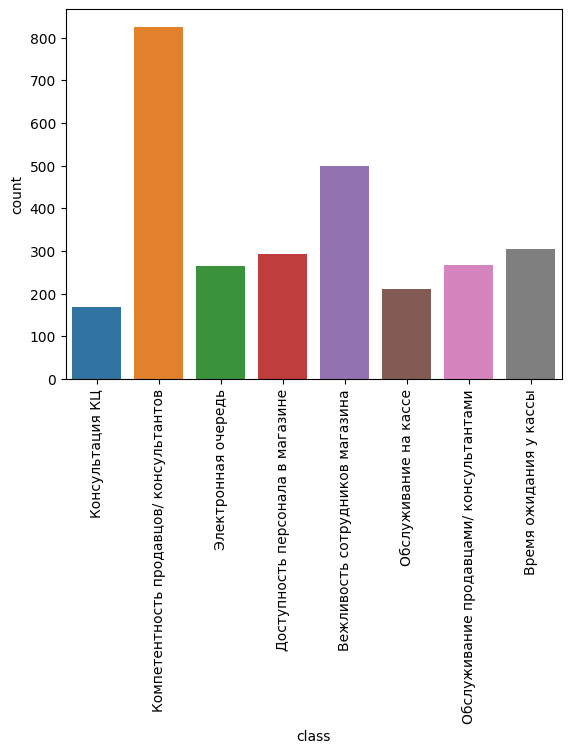

In [4]:
# создае график кол-ва классов
ax = sns.countplot(df, x = 'class')
# Поворачиваем подписи оси X на 90 градусов
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
# Отображаем график
plt.show()


In [5]:
df['class'].value_counts() # узнаем кол-во комментариев для каждой категории

Компетентность продавцов/ консультантов    825
Вежливость сотрудников магазина            500
Время ожидания у кассы                     306
Доступность персонала в магазине           293
Обслуживание продавцами/ консультантами    267
Электронная очередь                        264
Обслуживание на кассе                      212
Консультация КЦ                            170
Name: class, dtype: int64

<AxesSubplot: ylabel='class'>

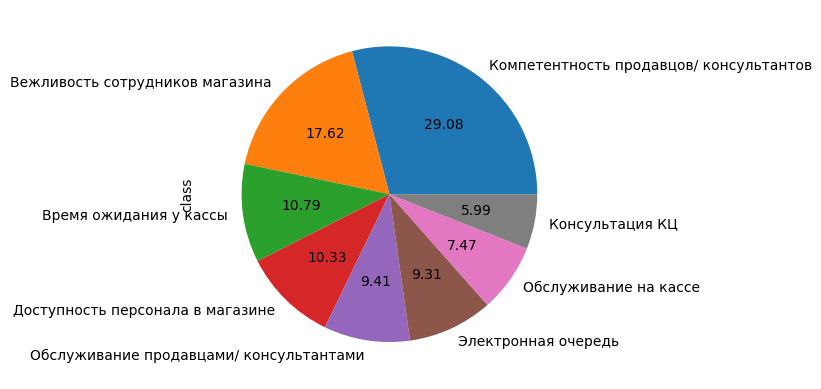

In [6]:
# построим круговую диаграмму для всех классов (для наглядности)
df['class'].value_counts().plot.pie(autopct='%.2f')

***Очевидно, что классы не сбалансированы, при обучении модели может произойти такое, что один класс модель определяет лучше, так как он встречается чаще и скор по нему будет отличный, а для остальных плохой, поэтому необходимо сбалансировать классы. Это можно сделать различными способами: добавлять специальные веса для каждого класса, андерсемплить классы, оверсемплить и т.д. Произведем случайный андерсемплинг данных, так как это снижает риск переобучения на доминирующих классах. В случае неудовлетворительных скоров, будем оверспемплить данные, так как может быть моделям просто будет не хватать отзывов клиентов для точной классификации***

# Undersampling

In [7]:
# Импортируем необходимую библиотеку для андерсемплинга
from imblearn.under_sampling import RandomUnderSampler
X=df.drop(['class'], axis = 1) # признаки
y=df['class'] #целевая переменная
rus = RandomUnderSampler(random_state = 42)
X_res_rus, y_res_rus = rus.fit_resample(X, y)


In [8]:
X_res_rus

,text
1990,"на выдаче почувствовал себя в 1970-х годах, ме..."
375,"негативное всоздалось сразу, при входе, стоит ..."
2051,к товару претензий нет. 05.03.2023 получали на...
874,очень навязчивый сотрудник на выдаче заказа. р...
515,"в зале продавцы максимальные хамы, для себели ..."
...,...
1918,я не понимаю зачем сделана электронная очередь...
2465,"пришла, взяла талон. написано, что смотрите ст..."
955,не работает электронная очередь
1016,после того как получил талон электронной очере...


# Russian preprocessing + tfidf vec

In [9]:
# есть множество способов препроцессить русский язык - nltk отличная библиотека для лемматизации и препроцессинга в целом
import pymorphy2
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\Users\BAZA
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\BAZA
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
# токенизируем текст отзыва
def preprocess(text, stop_words, punctuation_marks, morph):
    tokens = word_tokenize(text.lower())
    preprocessed_text = []
    for token in tokens:
        if token not in punctuation_marks:
            lemma = morph.parse(token)[0].normal_form
            if lemma not in stop_words:
                preprocessed_text.append(lemma)
    return preprocessed_text
punctuation_marks = ['!', ',', '(', ')', ':', '-', '?', '.', '..', '...']
stop_words = stopwords.words("russian")
morph = pymorphy2.MorphAnalyzer()

In [11]:
X_res_rus['Preprocessed_texts'] = X_res_rus.apply(lambda row: preprocess(row['text'], punctuation_marks, stop_words, morph), axis=1)

In [12]:
X_res_rus

,text,Preprocessed_texts
1990,"на выдаче почувствовал себя в 1970-х годах, ме...","[выдача, почувствовать, 1970-й, год, медленный..."
375,"негативное всоздалось сразу, при входе, стоит ...","[негативный, всоздаться, сразу, вход, стоить, ..."
2051,к товару претензий нет. 05.03.2023 получали на...,"[товар, претензия, 05.03.2023, получать, стойк..."
874,очень навязчивый сотрудник на выдаче заказа. р...,"[очень, навязчивый, сотрудник, выдача, заказ, ..."
515,"в зале продавцы максимальные хамы, для себели ...","[зал, продавец, максимальный, хам, себель, сто..."
...,...,...
1918,я не понимаю зачем сделана электронная очередь...,"[понимать, сделать, электронный, очередь, моме..."
2465,"пришла, взяла талон. написано, что смотрите ст...","[прийти, взять, талон, написать, смотреть, ста..."
955,не работает электронная очередь,"[работать, электронный, очередь]"
1016,после того как получил талон электронной очере...,"[получить, талон, электронный, очередь, выдача..."


In [13]:
# Склеиваем элементы списка в сроку
def simple_text(text):
    stroka=''
    for i in range(len(text)):
        stroka=stroka +text[i]+' '
    return stroka

s1mple=X_res_rus['Preprocessed_texts'].apply(simple_text)
s1mple

1990    выдача почувствовать 1970-й год медленный хаба...
375     негативный всоздаться сразу вход стоить крайне...
2051    товар претензия 05.03.2023 получать стойка инт...
874     очень навязчивый сотрудник выдача заказ раздра...
515     зал продавец максимальный хам себель стоящий с...
                              ...                        
1918    понимать сделать электронный очередь момент вз...
2465    прийти взять талон написать смотреть статус та...
955                         работать электронный очередь 
1016    получить талон электронный очередь выдача това...
1376    тёплый стан понятно забирать заказ сотрудник с...
Name: Preprocessed_texts, Length: 1360, dtype: object

In [14]:
X_res_rus['Simple_Text']=s1mple

In [15]:
# Производим TF_IDF векторизацию (можно было векторизовать текст с помощью navek, но для подобной задачи он не обязателен)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
X_NEW=X_res_rus['Simple_Text']
y_new=y_res_rus

In [16]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_NEW, y_new, test_size=0.2, random_state=42,stratify=y_new)

In [17]:
tfidf=TfidfVectorizer()
tfidf.fit(X_train_new)
X_TRAIN_TFIDF_NEW=tfidf.transform(X_train_new)
X_TEST_TFIDF_NEW=tfidf.transform(X_test_new)
X_TRAIN_TFIDF_NEW

<1088x3521 sparse matrix of type '<class 'numpy.float64'>'
	with 18960 stored elements in Compressed Sparse Row format>

# Построение моделей

In [18]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

dtc.fit(X_TRAIN_TFIDF_NEW, y_train_new)

DecisionTreeClassifier()

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay,classification_report,f1_score
def report(model):
    preds = model.predict(X_TEST_TFIDF_NEW)
    print(classification_report(y_test_new,preds))
    ConfusionMatrixDisplay.from_estimator(model,X_TEST_TFIDF_NEW,y_test_new,xticks_rotation='vertical')
    print(f1_score(y_test_new,preds,average='weighted'))

                                         precision    recall  f1-score   support

        Вежливость сотрудников магазина       0.59      0.59      0.59        34
                 Время ожидания у кассы       0.81      0.76      0.79        34
       Доступность персонала в магазине       0.54      0.59      0.56        34
Компетентность продавцов/ консультантов       0.50      0.59      0.54        34
                        Консультация КЦ       0.94      0.85      0.89        34
                  Обслуживание на кассе       0.64      0.68      0.66        34
Обслуживание продавцами/ консультантами       0.34      0.29      0.32        34
                    Электронная очередь       0.82      0.79      0.81        34

                               accuracy                           0.64       272
                              macro avg       0.65      0.64      0.64       272
                           weighted avg       0.65      0.64      0.64       272

0.6441144900489643


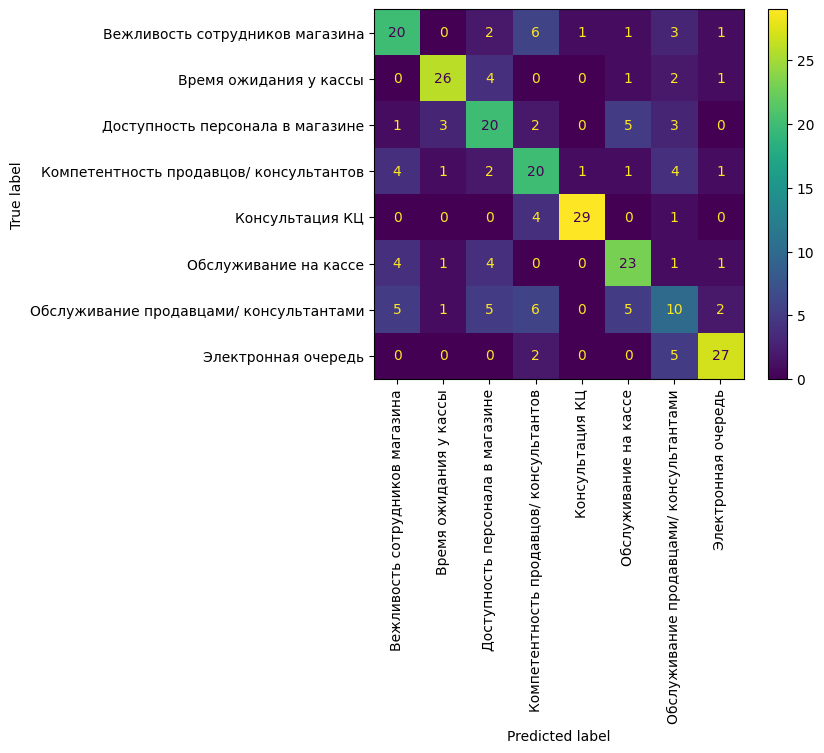

In [20]:
report(dtc)

In [21]:
from sklearn.naive_bayes import MultinomialNB
MNB=MultinomialNB()
MNB.fit(X_TRAIN_TFIDF_NEW,y_train_new)

MultinomialNB()

                                         precision    recall  f1-score   support

        Вежливость сотрудников магазина       0.59      0.50      0.54        34
                 Время ожидания у кассы       0.63      0.56      0.59        34
       Доступность персонала в магазине       0.61      0.74      0.67        34
Компетентность продавцов/ консультантов       1.00      0.41      0.58        34
                        Консультация КЦ       0.87      1.00      0.93        34
                  Обслуживание на кассе       0.68      0.68      0.68        34
Обслуживание продавцами/ консультантами       0.56      0.59      0.57        34
                    Электронная очередь       0.69      1.00      0.82        34

                               accuracy                           0.68       272
                              macro avg       0.70      0.68      0.67       272
                           weighted avg       0.70      0.68      0.67       272

0.6727644571369011


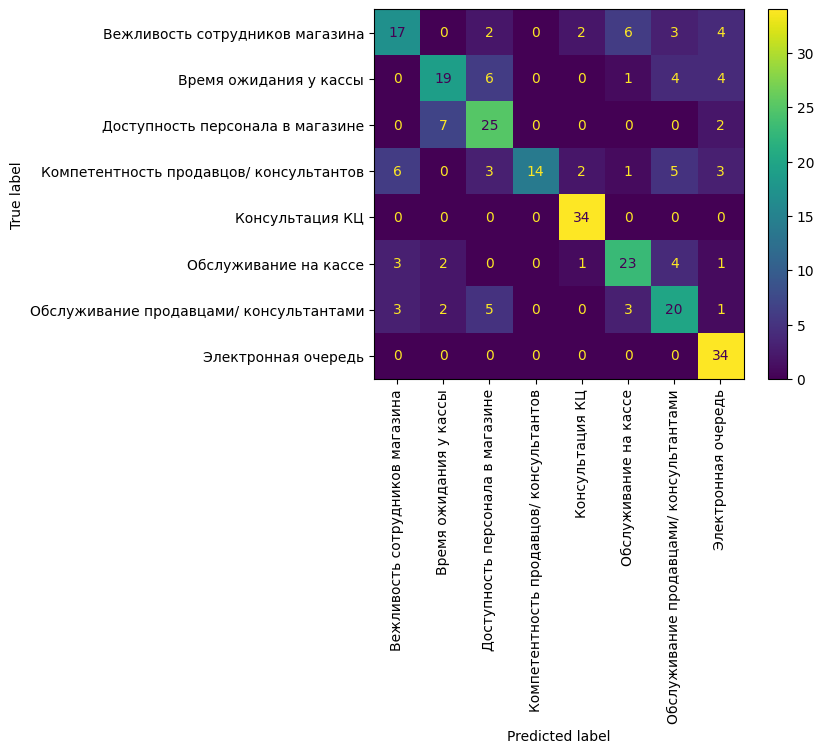

In [22]:
report(MNB)

In [23]:
from sklearn.svm import LinearSVC
svc = LinearSVC()
svc.fit(X_TRAIN_TFIDF_NEW,y_train_new)

C:\Users\BAZA PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

                                         precision    recall  f1-score   support

        Вежливость сотрудников магазина       0.79      0.65      0.71        34
                 Время ожидания у кассы       0.74      0.76      0.75        34
       Доступность персонала в магазине       0.68      0.74      0.70        34
Компетентность продавцов/ консультантов       0.81      0.65      0.72        34
                        Консультация КЦ       0.87      1.00      0.93        34
                  Обслуживание на кассе       0.78      0.74      0.76        34
Обслуживание продавцами/ консультантами       0.65      0.65      0.65        34
                    Электронная очередь       0.82      0.97      0.89        34

                               accuracy                           0.77       272
                              macro avg       0.77      0.77      0.76       272
                           weighted avg       0.77      0.77      0.76       272

0.7646088446994097


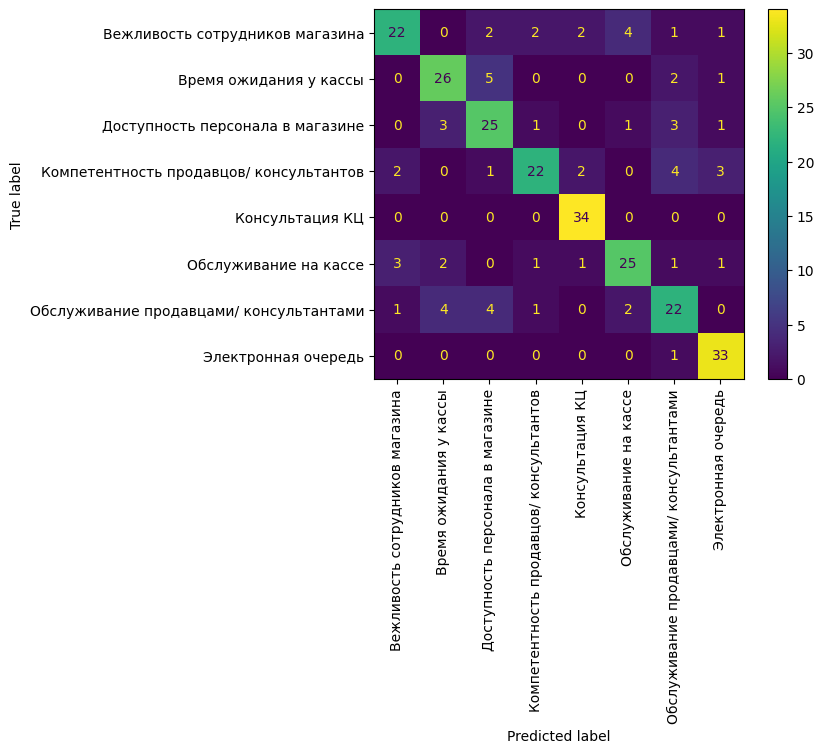

In [24]:
report(svc)

In [25]:
# найдем оптимальное количество соседей для метода к ближайших соседей
from  sklearn.neighbors import KNeighborsClassifier
import numpy as np
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_TRAIN_TFIDF_NEW,y_train_new)
    pred_i = knn.predict(X_TEST_TFIDF_NEW)
    error_rate.append(np.mean(pred_i != y_test_new))


Text(0, 0.5, 'Error Rate')

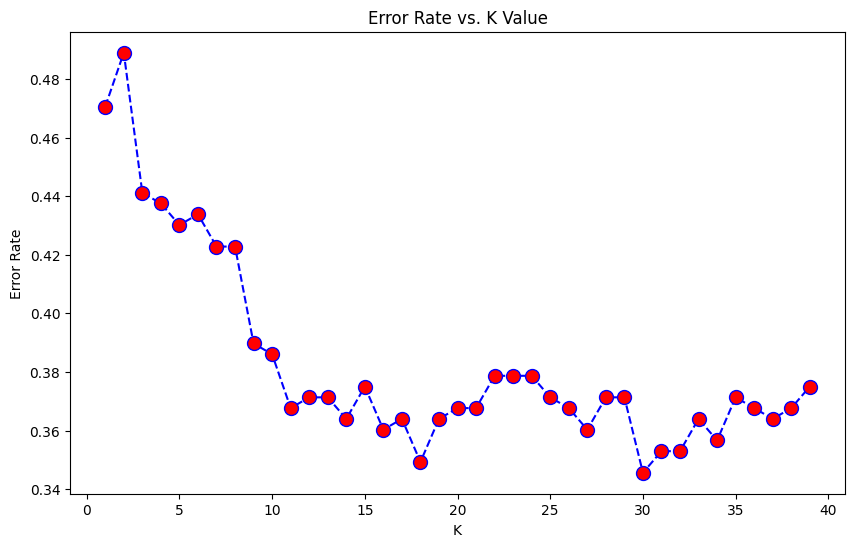

In [26]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [27]:
from  sklearn.neighbors import KNeighborsClassifier
KNC = KNeighborsClassifier(n_neighbors = 30, metric = 'euclidean') # оптимальное кол-во соседей = 30
KNC.fit(X_TRAIN_TFIDF_NEW,y_train_new)

KNeighborsClassifier(metric='euclidean', n_neighbors=30)

                                         precision    recall  f1-score   support

        Вежливость сотрудников магазина       0.60      0.53      0.56        34
                 Время ожидания у кассы       0.60      0.85      0.71        34
       Доступность персонала в магазине       0.42      0.85      0.56        34
Компетентность продавцов/ консультантов       0.86      0.35      0.50        34
                        Консультация КЦ       0.94      0.97      0.96        34
                  Обслуживание на кассе       0.73      0.47      0.57        34
Обслуживание продавцами/ консультантами       0.67      0.29      0.41        34
                    Электронная очередь       0.79      0.91      0.85        34

                               accuracy                           0.65       272
                              macro avg       0.70      0.65      0.64       272
                           weighted avg       0.70      0.65      0.64       272

0.6397940642056895


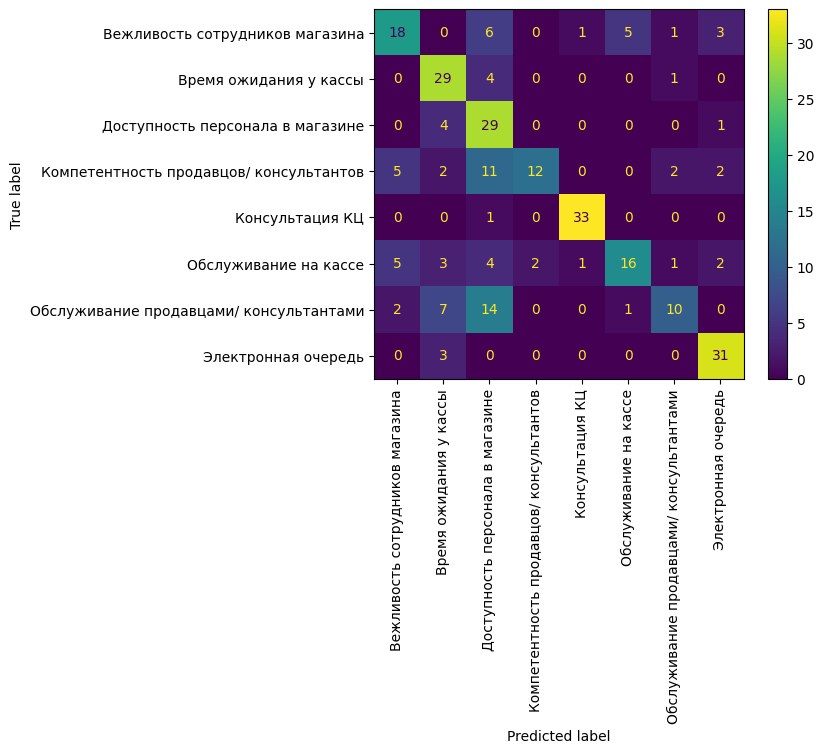

In [28]:
report(KNC)

In [29]:
# сделаем поиск по сетке параметров для случайного леса
# кол-во деревьев в лесу
n_estimators = [100,110,120,130,135,140,150,160,170,180,190,200]

# макс глубина дерева
max_depth = [14,16,18,20,21,22,23,24,25,26]

# кол-во семплов
max_samples = [0.75,0.8,0.9,1.0]



In [30]:
param_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'max_samples':max_samples
             }
print(param_grid)

{'n_estimators': [100, 110, 120, 130, 135, 140, 150, 160, 170, 180, 190, 200], 'max_depth': [14, 16, 18, 20, 21, 22, 23, 24, 25, 26], 'max_samples': [0.75, 0.8, 0.9, 1.0]}


In [31]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

In [32]:
from sklearn.model_selection import GridSearchCV

rf_grid = GridSearchCV(estimator = rf, 
                       param_grid = param_grid, 
                       cv = 3, 
                       verbose=2, 
                       n_jobs = -1)

In [33]:
rf_grid.fit(X_TRAIN_TFIDF_NEW,y_train_new)

Fitting 3 folds for each of 480 candidates, totalling 1440 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [14, 16, 18, 20, 21, 22, 23, 24, 25, 26],
                         'max_samples': [0.75, 0.8, 0.9, 1.0],
                         'n_estimators': [100, 110, 120, 130, 135, 140, 150,
                                          160, 170, 180, 190, 200]},
             verbose=2)

In [34]:
rf_grid.best_params_

{'max_depth': 23, 'max_samples': 1.0, 'n_estimators': 190}

In [35]:
rf_grid.best_score_

0.751853035630032

# Выводы по андерсемплингу и показаниям моделей


***F1 недостаточно высокий, возможно моделям действительно не хватает данных, потому что для подобных задач обычно метод опорных векторов и случайный лес выдают хорошие результаты (в среднем в районе 0.9 и выше!) В связи с этим, попробуем оверсемплить данные, да, это замедлит процесс обучения моделей, однако метрики качества могут вырасти***


# Oversampling


In [36]:
from imblearn.over_sampling import RandomOverSampler
X=df.drop(['class'],axis=1)
y=df['class']
ros = RandomOverSampler(random_state=42)
X_res_ros, y_res_ros = ros.fit_resample(X, y)


In [37]:
y_res_ros.value_counts()

Консультация КЦ                            825
Компетентность продавцов/ консультантов    825
Электронная очередь                        825
Доступность персонала в магазине           825
Вежливость сотрудников магазина            825
Обслуживание на кассе                      825
Обслуживание продавцами/ консультантами    825
Время ожидания у кассы                     825
Name: class, dtype: int64

In [38]:
X_res_ros['Preprocessed_texts'] = X_res_ros.apply(lambda row: preprocess(row['text'], punctuation_marks, stop_words, morph), axis=1)

In [39]:
X_res_ros

,text,Preprocessed_texts
0,негатив к вам и горячей линии которые нафиг н...,"[негатив, горячий, линия, который, нафиг, нужн..."
1,перестаньте впаривать клиентам дополнительные ...,"[перестать, впаривать, клиент, дополнительный,..."
2,продавец предложил наклеить защитную плёнку з...,"[продавец, предложить, наклеить, защитный, плё..."
3,продавец режил продать нам товар почему то по ...,"[продавец, режить, продать, мы, товар, почему,..."
4,навязанные услуги ( без моего согласия) на сум...,"[навязать, услуга, мой, согласие, сумма, 1949,..."
...,...,...
6595,долгое обслуживание. какой-то талончик при вхо...,"[долгий, обслуживание, какой-то, талончик, вхо..."
6596,"пришёл, взял талон, на выдаче никого и в очере...","[прийти, взять, талон, выдача, никто, очередь,..."
6597,очень тяжело найти этот магазин. электронный н...,"[очень, тяжело, найти, магазин, электронный, н..."
6598,"добавьте в смс о готовности товара информацию,...","[добавить, смс, готовность, товар, информация,..."


In [40]:
s1mple=X_res_ros['Preprocessed_texts'].apply(simple_text)
s1mple

0       негатив горячий линия который нафиг нужный воо...
1       перестать впаривать клиент дополнительный това...
2       продавец предложить наклеить защитный плёнка 1...
3       продавец режить продать мы товар почему завыси...
4          навязать услуга мой согласие сумма 1949 рубль 
                              ...                        
6595    долгий обслуживание какой-то талончик вход нуж...
6596    прийти взять талон выдача никто очередь никто ...
6597    очень тяжело найти магазин электронный номер п...
6598    добавить смс готовность товар информация магаз...
6599    получить талон электронный очередь выдача това...
Name: Preprocessed_texts, Length: 6600, dtype: object

In [41]:
X_res_ros['Simple_Text']=s1mple

In [42]:
X_res_ros

,text,Preprocessed_texts,Simple_Text
0,негатив к вам и горячей линии которые нафиг н...,"[негатив, горячий, линия, который, нафиг, нужн...",негатив горячий линия который нафиг нужный воо...
1,перестаньте впаривать клиентам дополнительные ...,"[перестать, впаривать, клиент, дополнительный,...",перестать впаривать клиент дополнительный това...
2,продавец предложил наклеить защитную плёнку з...,"[продавец, предложить, наклеить, защитный, плё...",продавец предложить наклеить защитный плёнка 1...
3,продавец режил продать нам товар почему то по ...,"[продавец, режить, продать, мы, товар, почему,...",продавец режить продать мы товар почему завыси...
4,навязанные услуги ( без моего согласия) на сум...,"[навязать, услуга, мой, согласие, сумма, 1949,...",навязать услуга мой согласие сумма 1949 рубль
...,...,...,...
6595,долгое обслуживание. какой-то талончик при вхо...,"[долгий, обслуживание, какой-то, талончик, вхо...",долгий обслуживание какой-то талончик вход нуж...
6596,"пришёл, взял талон, на выдаче никого и в очере...","[прийти, взять, талон, выдача, никто, очередь,...",прийти взять талон выдача никто очередь никто ...
6597,очень тяжело найти этот магазин. электронный н...,"[очень, тяжело, найти, магазин, электронный, н...",очень тяжело найти магазин электронный номер п...
6598,"добавьте в смс о готовности товара информацию,...","[добавить, смс, готовность, товар, информация,...",добавить смс готовность товар информация магаз...


In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
X_NEW=X_res_ros['Simple_Text']
y_new=y_res_ros

In [44]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_NEW, y_new, test_size=0.2, random_state=42,stratify=y_new)

In [45]:
tfidf=TfidfVectorizer()
tfidf.fit(X_train_new)
X_TRAIN_TFIDF_NEW=tfidf.transform(X_train_new)
X_TEST_TFIDF_NEW=tfidf.transform(X_test_new)
X_TRAIN_TFIDF_NEW

<5280x6083 sparse matrix of type '<class 'numpy.float64'>'
	with 96045 stored elements in Compressed Sparse Row format>

# Тест моделей на овер. данных

In [46]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

dtc.fit(X_TRAIN_TFIDF_NEW, y_train_new)

DecisionTreeClassifier()

                                         precision    recall  f1-score   support

        Вежливость сотрудников магазина       0.93      0.98      0.95       165
                 Время ожидания у кассы       0.98      0.96      0.97       165
       Доступность персонала в магазине       0.88      0.96      0.92       165
Компетентность продавцов/ консультантов       0.91      0.65      0.76       165
                        Консультация КЦ       0.99      1.00      1.00       165
                  Обслуживание на кассе       0.97      0.98      0.97       165
Обслуживание продавцами/ консультантами       0.88      0.98      0.93       165
                    Электронная очередь       0.97      1.00      0.99       165

                               accuracy                           0.94      1320
                              macro avg       0.94      0.94      0.93      1320
                           weighted avg       0.94      0.94      0.93      1320

0.9348358935946034


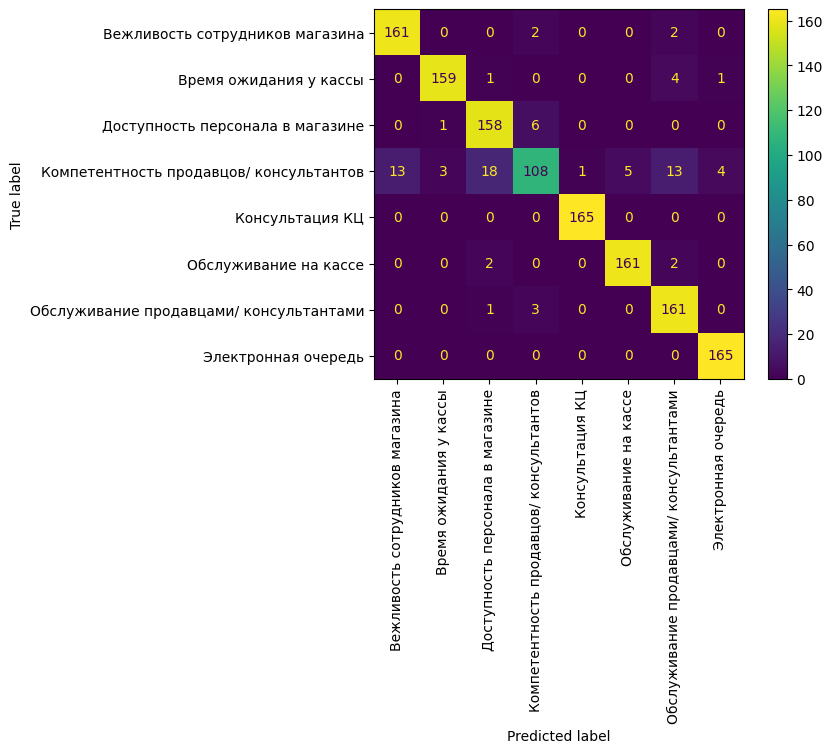

In [47]:
report(dtc)

In [48]:
MNB=MultinomialNB()
MNB.fit(X_TRAIN_TFIDF_NEW,y_train_new)

MultinomialNB()

                                         precision    recall  f1-score   support

        Вежливость сотрудников магазина       0.91      0.84      0.87       165
                 Время ожидания у кассы       0.94      0.90      0.92       165
       Доступность персонала в магазине       0.94      0.93      0.94       165
Компетентность продавцов/ консультантов       0.93      0.55      0.69       165
                        Консультация КЦ       0.94      1.00      0.97       165
                  Обслуживание на кассе       0.78      0.93      0.85       165
Обслуживание продавцами/ консультантами       0.80      0.95      0.87       165
                    Электронная очередь       0.88      0.98      0.93       165

                               accuracy                           0.88      1320
                              macro avg       0.89      0.88      0.88      1320
                           weighted avg       0.89      0.88      0.88      1320

0.8784254789909441


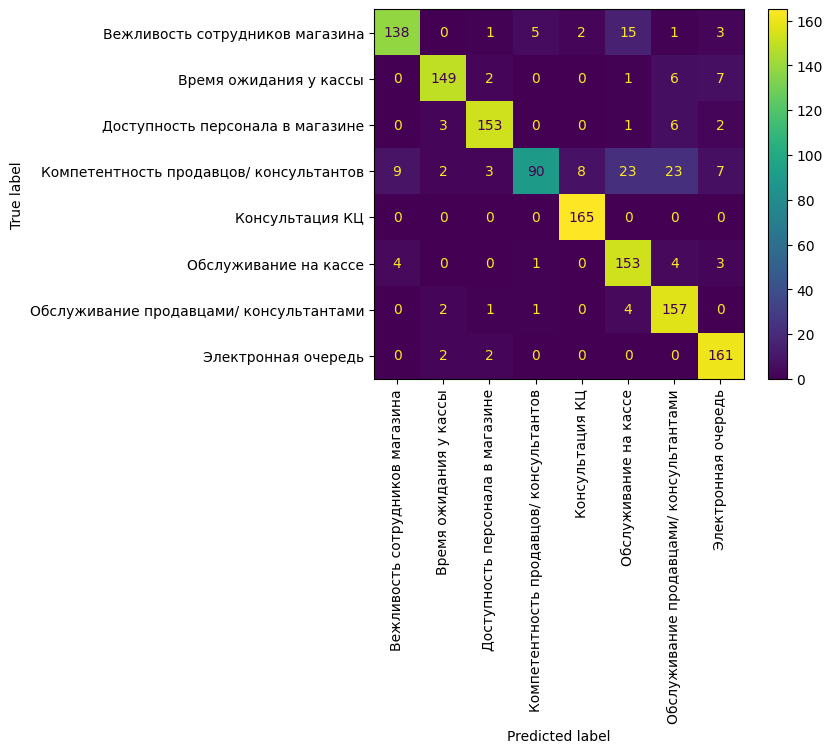

In [49]:
report(MNB)

In [50]:
from sklearn.svm import LinearSVC
svc = LinearSVC()
svc.fit(X_TRAIN_TFIDF_NEW,y_train_new)

C:\Users\BAZA PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

                                         precision    recall  f1-score   support

        Вежливость сотрудников магазина       0.87      0.95      0.90       165
                 Время ожидания у кассы       0.97      0.98      0.97       165
       Доступность персонала в магазине       0.90      0.98      0.94       165
Компетентность продавцов/ консультантов       0.92      0.75      0.83       165
                        Консультация КЦ       0.99      1.00      1.00       165
                  Обслуживание на кассе       0.96      0.95      0.95       165
Обслуживание продавцами/ консультантами       0.95      0.95      0.95       165
                    Электронная очередь       0.98      1.00      0.99       165

                               accuracy                           0.94      1320
                              macro avg       0.94      0.94      0.94      1320
                           weighted avg       0.94      0.94      0.94      1320

0.9420266381835353


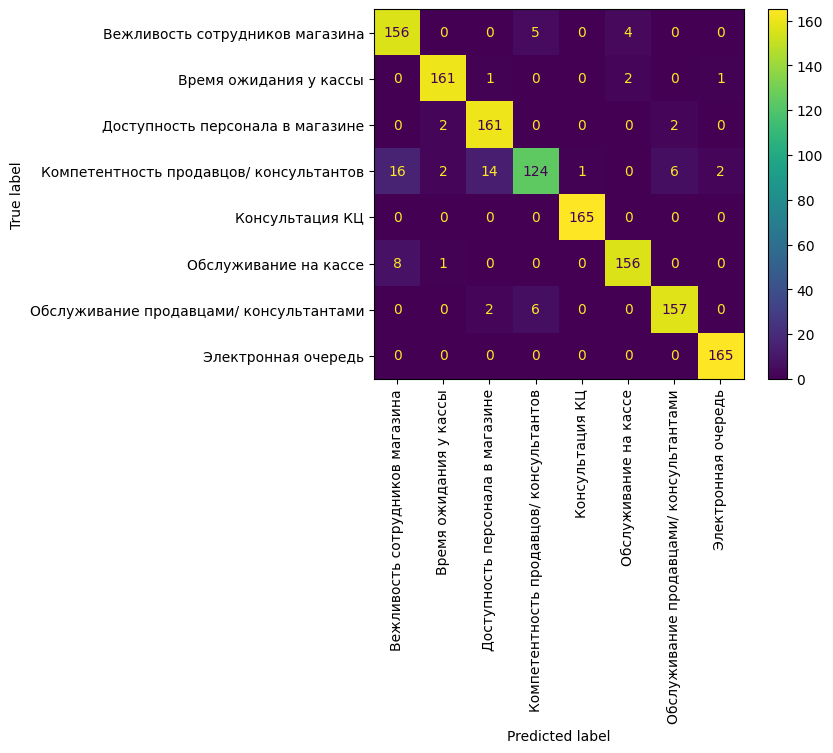

In [51]:
report(svc)

In [52]:
# найдем оптимальное количество соседей для метода к ближайших соседей
from  sklearn.neighbors import KNeighborsClassifier
import numpy as np
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_TRAIN_TFIDF_NEW,y_train_new)
    pred_i = knn.predict(X_TEST_TFIDF_NEW)
    error_rate.append(np.mean(pred_i != y_test_new))

Text(0, 0.5, 'Error Rate')

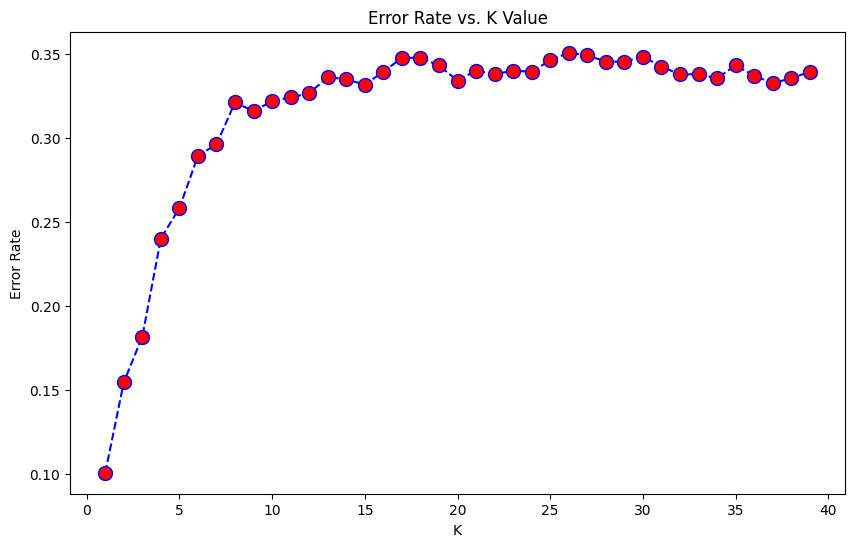

In [53]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [54]:
KNC = KNeighborsClassifier(n_neighbors = 1, metric = 'euclidean') # оптимальное кол-во соседей = 1
KNC.fit(X_TRAIN_TFIDF_NEW,y_train_new)

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

                                         precision    recall  f1-score   support

        Вежливость сотрудников магазина       0.85      0.89      0.87       165
                 Время ожидания у кассы       0.90      0.93      0.91       165
       Доступность персонала в магазине       0.79      0.98      0.87       165
Компетентность продавцов/ консультантов       0.84      0.51      0.63       165
                        Консультация КЦ       0.97      0.99      0.98       165
                  Обслуживание на кассе       0.92      0.96      0.94       165
Обслуживание продавцами/ консультантами       0.95      0.96      0.96       165
                    Электронная очередь       0.97      0.98      0.97       165

                               accuracy                           0.90      1320
                              macro avg       0.90      0.90      0.89      1320
                           weighted avg       0.90      0.90      0.89      1320

0.8929012733892739


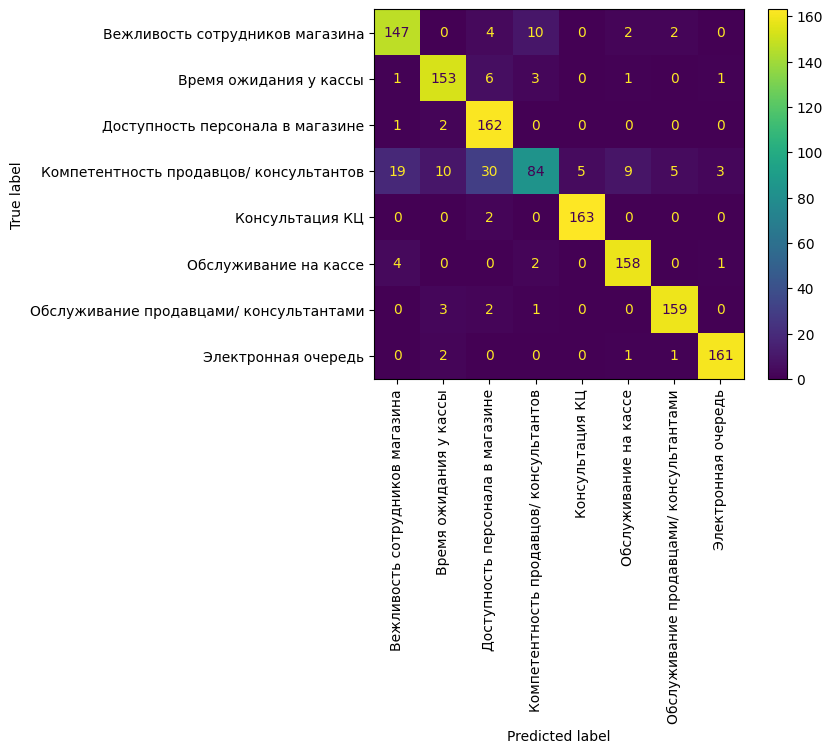

In [55]:
report(KNC)

In [56]:
# сделаем поиск по сетке параметров для случайного леса
# кол-во деревьев в лесу
n_estimators = [100,110,120,130,135,140,150,160,170,180,190,200]

# макс глубина дерева
max_depth = [14,16,18,20,21,22,23,24,25,26]

# кол-во семплов
max_samples = [0.75,0.8,0.9,1.0]


In [57]:
param_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'max_samples':max_samples
             }
print(param_grid)

{'n_estimators': [100, 110, 120, 130, 135, 140, 150, 160, 170, 180, 190, 200], 'max_depth': [14, 16, 18, 20, 21, 22, 23, 24, 25, 26], 'max_samples': [0.75, 0.8, 0.9, 1.0]}


In [58]:
rf = RandomForestClassifier(random_state=42)

In [59]:
from sklearn.model_selection import GridSearchCV

rf_grid = GridSearchCV(estimator = rf, 
                       param_grid = param_grid, 
                       cv = 5, 
                       verbose=2, 
                       n_jobs = -1)

In [61]:
rf_grid.fit(X_TRAIN_TFIDF_NEW,y_train_new)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [14, 16, 18, 20, 21, 22, 23, 24, 25, 26],
                         'max_samples': [0.75, 0.8, 0.9, 1.0],
                         'n_estimators': [100, 110, 120, 130, 135, 140, 150,
                                          160, 170, 180, 190, 200]},
             verbose=2)

In [ ]:
rf_grid.best_params_

{'max_depth': 26, 'max_samples': 1.0, 'n_estimators': 135}

In [ ]:
rf_grid.best_score_

0.9056818181818181

In [68]:
# нужно было заново импортить некторые библиотеки, без них не работало
from sklearn.ensemble import StackingClassifier
from sklearn.svm import LinearSVC as svc
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.ensemble import RandomForestClassifier as rf

# Предположим, что rf_grid - это экземпляр RandomForestClassifier с настроенными параметрами
rf_grid = rf(n_estimators=135, random_state=42,max_depth=26,max_samples=1)

# Создание экземпляра StackingClassifier с корректно определенными оценщиками и финализатором
sclf = StackingClassifier(estimators=[('svc', svc()), ('rf_grid', rf_grid)], final_estimator=dtc())

# Обучение модели
sclf.fit(X_TRAIN_TFIDF_NEW, y_train_new)

C:\Users\BAZA PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\BAZA PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\BAZA PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C

StackingClassifier(estimators=[('svc', LinearSVC()),
                               ('rf_grid',
                                RandomForestClassifier(max_depth=26,
                                                       max_samples=1,
                                                       n_estimators=135,
                                                       random_state=42))],
                   final_estimator=DecisionTreeClassifier())

                                         precision    recall  f1-score   support

        Вежливость сотрудников магазина       0.87      0.92      0.90       165
                 Время ожидания у кассы       0.98      0.98      0.98       165
       Доступность персонала в магазине       0.95      0.95      0.95       165
Компетентность продавцов/ консультантов       0.85      0.77      0.81       165
                        Консультация КЦ       1.00      0.99      0.99       165
                  Обслуживание на кассе       0.97      0.95      0.96       165
Обслуживание продавцами/ консультантами       0.91      0.96      0.93       165
                    Электронная очередь       0.98      0.99      0.98       165

                               accuracy                           0.94      1320
                              macro avg       0.94      0.94      0.94      1320
                           weighted avg       0.94      0.94      0.94      1320

0.9380686756857148


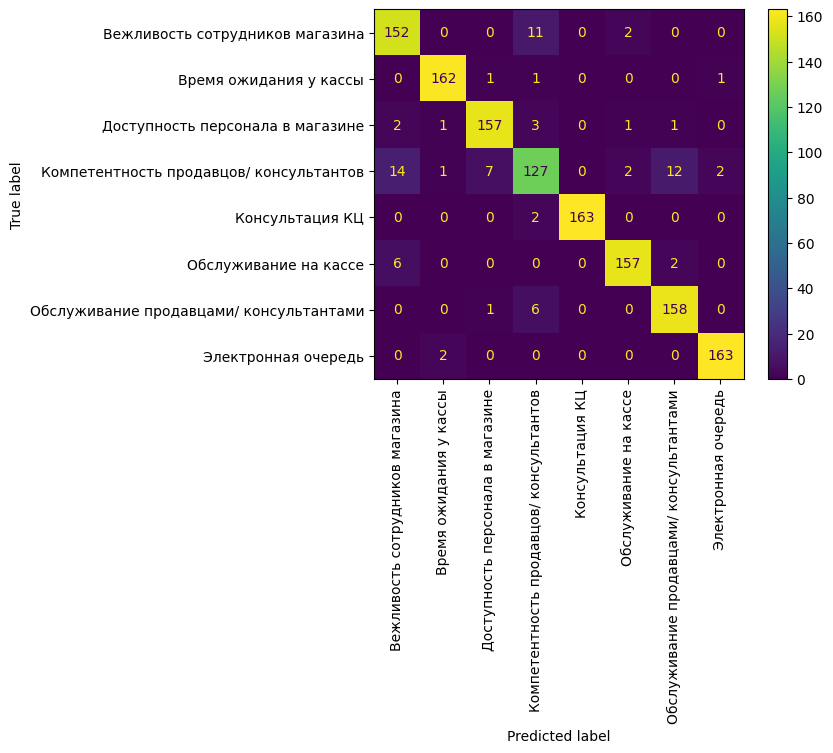

In [69]:
report(sclf)

***Лучшая модель - метод опорных векторов, f1=0.94. Маскимально неожиданный результат (надеялся, что стекинг победит)***

**Кстати, очевидно, что компетентность сотрудников модели часто путают с вежливостью или доступностью персонала, достаточно смежные понятия+людям свойсвтенно про компетентность говорить в негативном ключе, моделям тяжело из всех плохих слов выцепить смысл))**

In [ ]:
# Сохраним наилучшую модель для данного кейса
import joblib
joblib.dump(svc,'best_model.joblib')
model=joblib.load('../М.Тех/best_model.joblib')